In [2]:
!pip install "ultralytics==8.3.78"


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 35.4 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.8.19 torch-2.4.1+cu121 CUDA:0 (NVIDIA L40, 45386MiB)
Setup complete ✅ (96 CPUs, 503.3 GB RAM, 945.1/7038.1 GB disk)


In [4]:
from ultralytics import YOLO
from PIL import Image
import requests
#!wget https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo12n.pt
model = YOLO("yolo12n.pt")

In [5]:
import yaml
with open("/mnt/storage2/PanNuke/NuInseg/yolo_dataset/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [6]:
results = model.train(data='/mnt/storage2/PanNuke/NuInseg/yolo_dataset/data.yaml',
                      project='NuInsegyolov12',
                      name='100epochs',
                      epochs=100,
                      patience=0, #I am setting patience=0 to disable early stopping.
                      batch=4,
                      imgsz=512)

New https://pypi.org/project/ultralytics/8.3.110 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.78 🚀 Python-3.8.19 torch-2.4.1+cu121 CUDA:0 (NVIDIA L40, 45386MiB)
engine/trainer: task=detect, mode=train, model=yolo12n.pt, data=/mnt/storage2/PanNuke/NuInseg/yolo_dataset/data.yaml, epochs=100, time=None, patience=0, batch=4, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=NuInsegyolov12, name=100epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning /mnt/storage2/PanNuke/NuInseg/yolo_dataset/train/labels.cache... 465 images, 0 backgrounds, 0 corrupt: 100%|██████████| 465/465 [00:00<?, ?it/s]
/home/skogant3/miniconda3/envs/mask/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/home/skogant3/miniconda3/envs/mask/lib/python3.8/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /mnt/storage2/PanNuke/NuInseg/yolo_dataset/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]


Plotting labels to NuInsegyolov12/100epochs/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 8 dataloader workers
Logging results to NuInsegyolov12/100epochs
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.967G      1.995      2.452       1.26        139        512: 100%|██████████| 117/117 [00:08<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 20.69it/s]

                   all        133       6499      0.723      0.643      0.697      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.03G      1.852      1.296      1.197         48        512: 100%|██████████| 117/117 [00:07<00:00, 16.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 24.81it/s]

                   all        133       6499      0.715      0.668      0.715      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.936G      1.827      1.164      1.189         25        512: 100%|██████████| 117/117 [00:07<00:00, 16.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.91it/s]


                   all        133       6499      0.633      0.604      0.626      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.18G       1.79      1.144      1.162         75        512: 100%|██████████| 117/117 [00:06<00:00, 16.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 24.89it/s]

                   all        133       6499      0.749      0.685      0.752      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.998G       1.76      1.115      1.162         45        512: 100%|██████████| 117/117 [00:06<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 22.64it/s]

                   all        133       6499      0.737       0.68       0.74      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.24G       1.73      1.093      1.165         99        512: 100%|██████████| 117/117 [00:06<00:00, 17.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 24.58it/s]

                   all        133       6499      0.747      0.689      0.755      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      0.98G      1.779      1.088      1.174         36        512: 100%|██████████| 117/117 [00:06<00:00, 17.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 23.57it/s]

                   all        133       6499      0.771      0.684      0.768      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.12G      1.742      1.082      1.166         69        512: 100%|██████████| 117/117 [00:06<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.19it/s]


                   all        133       6499      0.745      0.679      0.759      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         1G      1.711      1.054      1.154         16        512: 100%|██████████| 117/117 [00:06<00:00, 17.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 24.64it/s]

                   all        133       6499      0.751      0.678      0.747      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.21G      1.699      1.041      1.139         46        512: 100%|██████████| 117/117 [00:06<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.69it/s]


                   all        133       6499      0.769      0.687      0.781      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.05G      1.705      1.026      1.147         77        512: 100%|██████████| 117/117 [00:06<00:00, 17.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 24.57it/s]

                   all        133       6499      0.778      0.696      0.777      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.889G      1.667     0.9772      1.148         63        512: 100%|██████████| 117/117 [00:06<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.07it/s]


                   all        133       6499       0.77      0.687      0.761      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.949G      1.682      1.033      1.133          7        512: 100%|██████████| 117/117 [00:06<00:00, 17.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.90it/s]


                   all        133       6499      0.792       0.71      0.798      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.924G      1.679      1.018      1.142         19        512: 100%|██████████| 117/117 [00:06<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.64it/s]


                   all        133       6499      0.792      0.705      0.795      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      0.99G       1.65     0.9869      1.143         21        512: 100%|██████████| 117/117 [00:06<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.22it/s]


                   all        133       6499      0.802       0.72      0.802      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.15G      1.659     0.9575      1.143         38        512: 100%|██████████| 117/117 [00:06<00:00, 17.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.82it/s]


                   all        133       6499      0.807      0.715      0.803      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.05G      1.692     0.9806      1.151         38        512: 100%|██████████| 117/117 [00:06<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.51it/s]


                   all        133       6499      0.777      0.698      0.788        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.986G      1.669     0.9603      1.134        102        512: 100%|██████████| 117/117 [00:06<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.31it/s]


                   all        133       6499       0.78      0.712      0.797      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.15G      1.646     0.9309      1.127         30        512: 100%|██████████| 117/117 [00:06<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 25.19it/s]


                   all        133       6499      0.764      0.708      0.773      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.02G      1.638     0.9472      1.127         83        512: 100%|██████████| 117/117 [00:06<00:00, 17.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.22it/s]


                   all        133       6499      0.818       0.73      0.819      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.781G      1.649     0.9488      1.131         41        512: 100%|██████████| 117/117 [00:06<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.58it/s]


                   all        133       6499      0.801      0.704      0.801      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.21G      1.643     0.9174      1.118         73        512: 100%|██████████| 117/117 [00:06<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.67it/s]


                   all        133       6499      0.806      0.727      0.813      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.02G      1.629     0.9249      1.123         24        512: 100%|██████████| 117/117 [00:06<00:00, 17.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.10it/s]


                   all        133       6499      0.796      0.722      0.803       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.04G      1.621     0.9157      1.117         72        512: 100%|██████████| 117/117 [00:06<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.63it/s]


                   all        133       6499      0.807      0.717      0.809      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.922G       1.62     0.9038      1.117         10        512: 100%|██████████| 117/117 [00:06<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.58it/s]


                   all        133       6499      0.814      0.748      0.824      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.965G      1.615     0.9012      1.103         70        512: 100%|██████████| 117/117 [00:06<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.44it/s]


                   all        133       6499      0.812      0.739      0.824       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.03G      1.607     0.8884      1.115        104        512: 100%|██████████| 117/117 [00:06<00:00, 17.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.49it/s]


                   all        133       6499      0.804      0.733      0.814      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.926G      1.596     0.8888      1.115         41        512: 100%|██████████| 117/117 [00:06<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.51it/s]


                   all        133       6499      0.803      0.727      0.821      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.732G      1.636     0.9103      1.128         29        512: 100%|██████████| 117/117 [00:06<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.58it/s]


                   all        133       6499      0.804      0.722      0.816      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.832G      1.606      0.897      1.103        140        512: 100%|██████████| 117/117 [00:06<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.25it/s]


                   all        133       6499      0.799      0.733      0.817      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.973G      1.596     0.9002      1.121         16        512: 100%|██████████| 117/117 [00:06<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.33it/s]


                   all        133       6499      0.807      0.728      0.808      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.09G        1.6     0.8869      1.101        177        512: 100%|██████████| 117/117 [00:06<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.60it/s]


                   all        133       6499      0.809      0.746      0.832      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.08G      1.577     0.8775      1.098        127        512: 100%|██████████| 117/117 [00:06<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.32it/s]


                   all        133       6499      0.814      0.734      0.822      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      0.98G      1.593     0.8808      1.119         38        512: 100%|██████████| 117/117 [00:06<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.35it/s]


                   all        133       6499      0.814      0.743      0.826      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.1G      1.615     0.8787      1.114        221        512: 100%|██████████| 117/117 [00:06<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.47it/s]


                   all        133       6499      0.826      0.746      0.836      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.14G      1.575     0.8561      1.095         19        512: 100%|██████████| 117/117 [00:06<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.51it/s]


                   all        133       6499      0.816      0.747      0.822      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.07G      1.595     0.8743      1.111        108        512: 100%|██████████| 117/117 [00:06<00:00, 17.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.44it/s]


                   all        133       6499      0.811      0.741      0.826      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.11G      1.591     0.8815      1.103         66        512: 100%|██████████| 117/117 [00:06<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.73it/s]


                   all        133       6499      0.823      0.732      0.824      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.957G      1.586      0.867      1.104         11        512: 100%|██████████| 117/117 [00:06<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.22it/s]


                   all        133       6499      0.809      0.754      0.833      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.08G      1.575     0.8583      1.103         27        512: 100%|██████████| 117/117 [00:06<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.80it/s]


                   all        133       6499      0.823      0.744      0.834      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.02G       1.58     0.8667      1.097        192        512: 100%|██████████| 117/117 [00:06<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.55it/s]


                   all        133       6499      0.819      0.759      0.838      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.05G      1.575     0.8505      1.086        212        512: 100%|██████████| 117/117 [00:07<00:00, 16.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.47it/s]


                   all        133       6499      0.819       0.76       0.84      0.467

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.02G      1.562     0.8554      1.104         19        512: 100%|██████████| 117/117 [00:06<00:00, 17.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.41it/s]


                   all        133       6499      0.805      0.738      0.812      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.04G       1.56     0.8478      1.097         62        512: 100%|██████████| 117/117 [00:06<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.42it/s]


                   all        133       6499      0.826      0.747      0.834      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.14G      1.568     0.8549      1.094         23        512: 100%|██████████| 117/117 [00:06<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.29it/s]


                   all        133       6499      0.824      0.759      0.837       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       1.2G      1.581     0.8594      1.112        291        512: 100%|██████████| 117/117 [00:06<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.47it/s]


                   all        133       6499      0.823      0.747      0.836      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.11G      1.557     0.8438      1.099         47        512: 100%|██████████| 117/117 [00:06<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.70it/s]


                   all        133       6499      0.821      0.749      0.831      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.969G       1.56     0.8483      1.096         25        512: 100%|██████████| 117/117 [00:06<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.65it/s]


                   all        133       6499      0.814      0.748      0.834      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       1.1G        1.6     0.8535      1.105         41        512: 100%|██████████| 117/117 [00:06<00:00, 17.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.48it/s]


                   all        133       6499      0.813      0.755      0.838      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.23G      1.564     0.8385      1.098         27        512: 100%|██████████| 117/117 [00:06<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.66it/s]


                   all        133       6499       0.81      0.765      0.836      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.22G      1.561     0.8433      1.104         38        512: 100%|██████████| 117/117 [00:06<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.42it/s]


                   all        133       6499      0.823      0.754      0.833      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.05G      1.553     0.8213      1.082         52        512: 100%|██████████| 117/117 [00:06<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.87it/s]


                   all        133       6499      0.826      0.762      0.844      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.984G      1.553     0.8284      1.085         36        512: 100%|██████████| 117/117 [00:06<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.65it/s]


                   all        133       6499       0.82      0.759      0.835      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.869G      1.548     0.8417      1.094         50        512: 100%|██████████| 117/117 [00:06<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.26it/s]


                   all        133       6499      0.822      0.766      0.844      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.05G       1.54     0.8295      1.088         27        512: 100%|██████████| 117/117 [00:06<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.65it/s]


                   all        133       6499      0.828      0.758      0.842      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.02G      1.538     0.8206       1.09         74        512: 100%|██████████| 117/117 [00:06<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.71it/s]


                   all        133       6499      0.823      0.754      0.835       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.971G      1.525     0.8185      1.098         20        512: 100%|██████████| 117/117 [00:06<00:00, 17.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.82it/s]


                   all        133       6499      0.825      0.757      0.842       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.04G      1.572     0.8345      1.096         80        512: 100%|██████████| 117/117 [00:06<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.68it/s]


                   all        133       6499      0.825      0.755      0.838       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.963G      1.516     0.8152      1.075         37        512: 100%|██████████| 117/117 [00:06<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.30it/s]


                   all        133       6499      0.832      0.754      0.843      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.19G      1.555     0.8314      1.098         31        512: 100%|██████████| 117/117 [00:06<00:00, 17.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.67it/s]


                   all        133       6499      0.823      0.766      0.838      0.471

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.12G      1.536     0.8102      1.085         75        512: 100%|██████████| 117/117 [00:06<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.74it/s]


                   all        133       6499      0.822       0.77      0.845      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.949G      1.555     0.8217      1.101         29        512: 100%|██████████| 117/117 [00:06<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.78it/s]


                   all        133       6499      0.831      0.771      0.849       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.908G      1.529     0.8157      1.094        116        512: 100%|██████████| 117/117 [00:06<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.64it/s]


                   all        133       6499      0.825      0.761      0.838      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.07G      1.522     0.8022      1.078         12        512: 100%|██████████| 117/117 [00:06<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 27.10it/s]

                   all        133       6499      0.835       0.76      0.844      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.969G      1.521     0.8171      1.078         35        512: 100%|██████████| 117/117 [00:06<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.68it/s]


                   all        133       6499      0.829      0.754      0.842      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.967G      1.534     0.8168      1.086        163        512: 100%|██████████| 117/117 [00:06<00:00, 17.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.69it/s]


                   all        133       6499      0.826      0.771      0.844      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.973G      1.524     0.8018      1.079         26        512: 100%|██████████| 117/117 [00:06<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.56it/s]


                   all        133       6499      0.825      0.767       0.85      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.04G      1.528     0.8033       1.08         55        512: 100%|██████████| 117/117 [00:06<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.34it/s]


                   all        133       6499      0.817      0.779      0.847      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       1.1G       1.54     0.8107      1.076         11        512: 100%|██████████| 117/117 [00:06<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.89it/s]


                   all        133       6499      0.829      0.762      0.843      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.938G      1.529     0.8104      1.078         61        512: 100%|██████████| 117/117 [00:06<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.96it/s]


                   all        133       6499      0.828      0.756      0.838      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.877G      1.518     0.7953      1.075         26        512: 100%|██████████| 117/117 [00:06<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.68it/s]


                   all        133       6499      0.824      0.773      0.847      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.04G      1.532     0.7963      1.084         77        512: 100%|██████████| 117/117 [00:06<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.97it/s]


                   all        133       6499      0.833      0.765      0.845      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.863G      1.536      0.801      1.071        137        512: 100%|██████████| 117/117 [00:06<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.74it/s]


                   all        133       6499      0.834      0.759      0.843      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.23G       1.51     0.7937      1.078         62        512: 100%|██████████| 117/117 [00:06<00:00, 17.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.71it/s]


                   all        133       6499      0.836      0.764      0.843      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.01G      1.499     0.7957      1.079         53        512: 100%|██████████| 117/117 [00:06<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.48it/s]


                   all        133       6499      0.827       0.77      0.847       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.14G      1.525     0.7977      1.079         12        512: 100%|██████████| 117/117 [00:06<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.64it/s]


                   all        133       6499      0.836      0.779      0.855      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.932G      1.498     0.7891      1.074         36        512: 100%|██████████| 117/117 [00:06<00:00, 17.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.79it/s]


                   all        133       6499      0.832      0.782      0.855      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.12G      1.469     0.7662      1.055        210        512: 100%|██████████| 117/117 [00:06<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.87it/s]


                   all        133       6499      0.828      0.777      0.852      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.04G      1.533     0.7888      1.065        109        512: 100%|██████████| 117/117 [00:06<00:00, 17.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.40it/s]


                   all        133       6499      0.837      0.772      0.852      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.06G        1.5     0.7785      1.078         26        512: 100%|██████████| 117/117 [00:06<00:00, 17.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.97it/s]

                   all        133       6499      0.841      0.768      0.854      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.15G      1.502     0.7784      1.064        102        512: 100%|██████████| 117/117 [00:06<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.47it/s]


                   all        133       6499      0.838      0.773      0.851       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.828G      1.511     0.7838      1.078         60        512: 100%|██████████| 117/117 [00:06<00:00, 17.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.95it/s]


                   all        133       6499      0.841      0.766      0.853      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.914G        1.5     0.7777      1.068        232        512: 100%|██████████| 117/117 [00:06<00:00, 17.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.44it/s]


                   all        133       6499      0.832      0.782      0.852      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.01G      1.503     0.7645      1.061         50        512: 100%|██████████| 117/117 [00:06<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.65it/s]


                   all        133       6499      0.836      0.787      0.859        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      0.98G      1.495     0.7776      1.068         52        512: 100%|██████████| 117/117 [00:06<00:00, 17.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.69it/s]


                   all        133       6499       0.84      0.777      0.857      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.25G      1.501     0.7815      1.082         82        512: 100%|██████████| 117/117 [00:06<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.90it/s]


                   all        133       6499      0.847      0.768      0.853      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.945G      1.473     0.7827       1.07         11        512: 100%|██████████| 117/117 [00:06<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.70it/s]


                   all        133       6499      0.848      0.772      0.859      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.902G      1.499     0.7722      1.066         83        512: 100%|██████████| 117/117 [00:06<00:00, 17.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.47it/s]


                   all        133       6499      0.844      0.769      0.855      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.06G      1.483     0.7669      1.058         31        512: 100%|██████████| 117/117 [00:06<00:00, 17.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.96it/s]


                   all        133       6499      0.843      0.768      0.854      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.969G      1.483     0.7618      1.067         13        512: 100%|██████████| 117/117 [00:06<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.84it/s]


                   all        133       6499      0.839      0.777      0.852      0.495
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.975G      1.477      0.773      1.086         86        512: 100%|██████████| 117/117 [00:06<00:00, 16.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.43it/s]


                   all        133       6499      0.835      0.782      0.853      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.953G      1.476     0.7759      1.085         10        512: 100%|██████████| 117/117 [00:06<00:00, 17.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.56it/s]


                   all        133       6499      0.832      0.788      0.855       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.947G      1.479      0.773       1.09         12        512: 100%|██████████| 117/117 [00:06<00:00, 17.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.68it/s]


                   all        133       6499      0.841      0.779      0.854      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.818G      1.483     0.7726       1.08         61        512: 100%|██████████| 117/117 [00:06<00:00, 17.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.78it/s]


                   all        133       6499      0.839      0.786      0.857      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      0.84G      1.476     0.7719      1.072         33        512: 100%|██████████| 117/117 [00:06<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.80it/s]


                   all        133       6499      0.839      0.782      0.855      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.881G      1.467     0.7716      1.084          3        512: 100%|██████████| 117/117 [00:06<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.78it/s]


                   all        133       6499      0.836      0.782      0.856      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.01G      1.476     0.7758      1.079        226        512: 100%|██████████| 117/117 [00:06<00:00, 17.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.88it/s]


                   all        133       6499       0.84      0.779      0.856      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.01G      1.457     0.7658      1.081         14        512: 100%|██████████| 117/117 [00:06<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.84it/s]


                   all        133       6499      0.846      0.778      0.857      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.816G      1.458     0.7561      1.077          9        512: 100%|██████████| 117/117 [00:06<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.79it/s]


                   all        133       6499       0.85      0.776      0.858      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         1G      1.449     0.7558      1.075        114        512: 100%|██████████| 117/117 [00:06<00:00, 17.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:00<00:00, 26.72it/s]


                   all        133       6499      0.845      0.781      0.857      0.496

100 epochs completed in 0.218 hours.
Optimizer stripped from NuInsegyolov12/100epochs/weights/last.pt, 5.5MB
Optimizer stripped from NuInsegyolov12/100epochs/weights/best.pt, 5.5MB

Validating NuInsegyolov12/100epochs/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.8.19 torch-2.4.1+cu121 CUDA:0 (NVIDIA L40, 45386MiB)
YOLOv12n summary (fused): 159 layers, 2,556,923 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.24it/s]


                   all        133       6499      0.835      0.786      0.859        0.5
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to NuInsegyolov12/100epochs


In [7]:

from IPython.display import Image

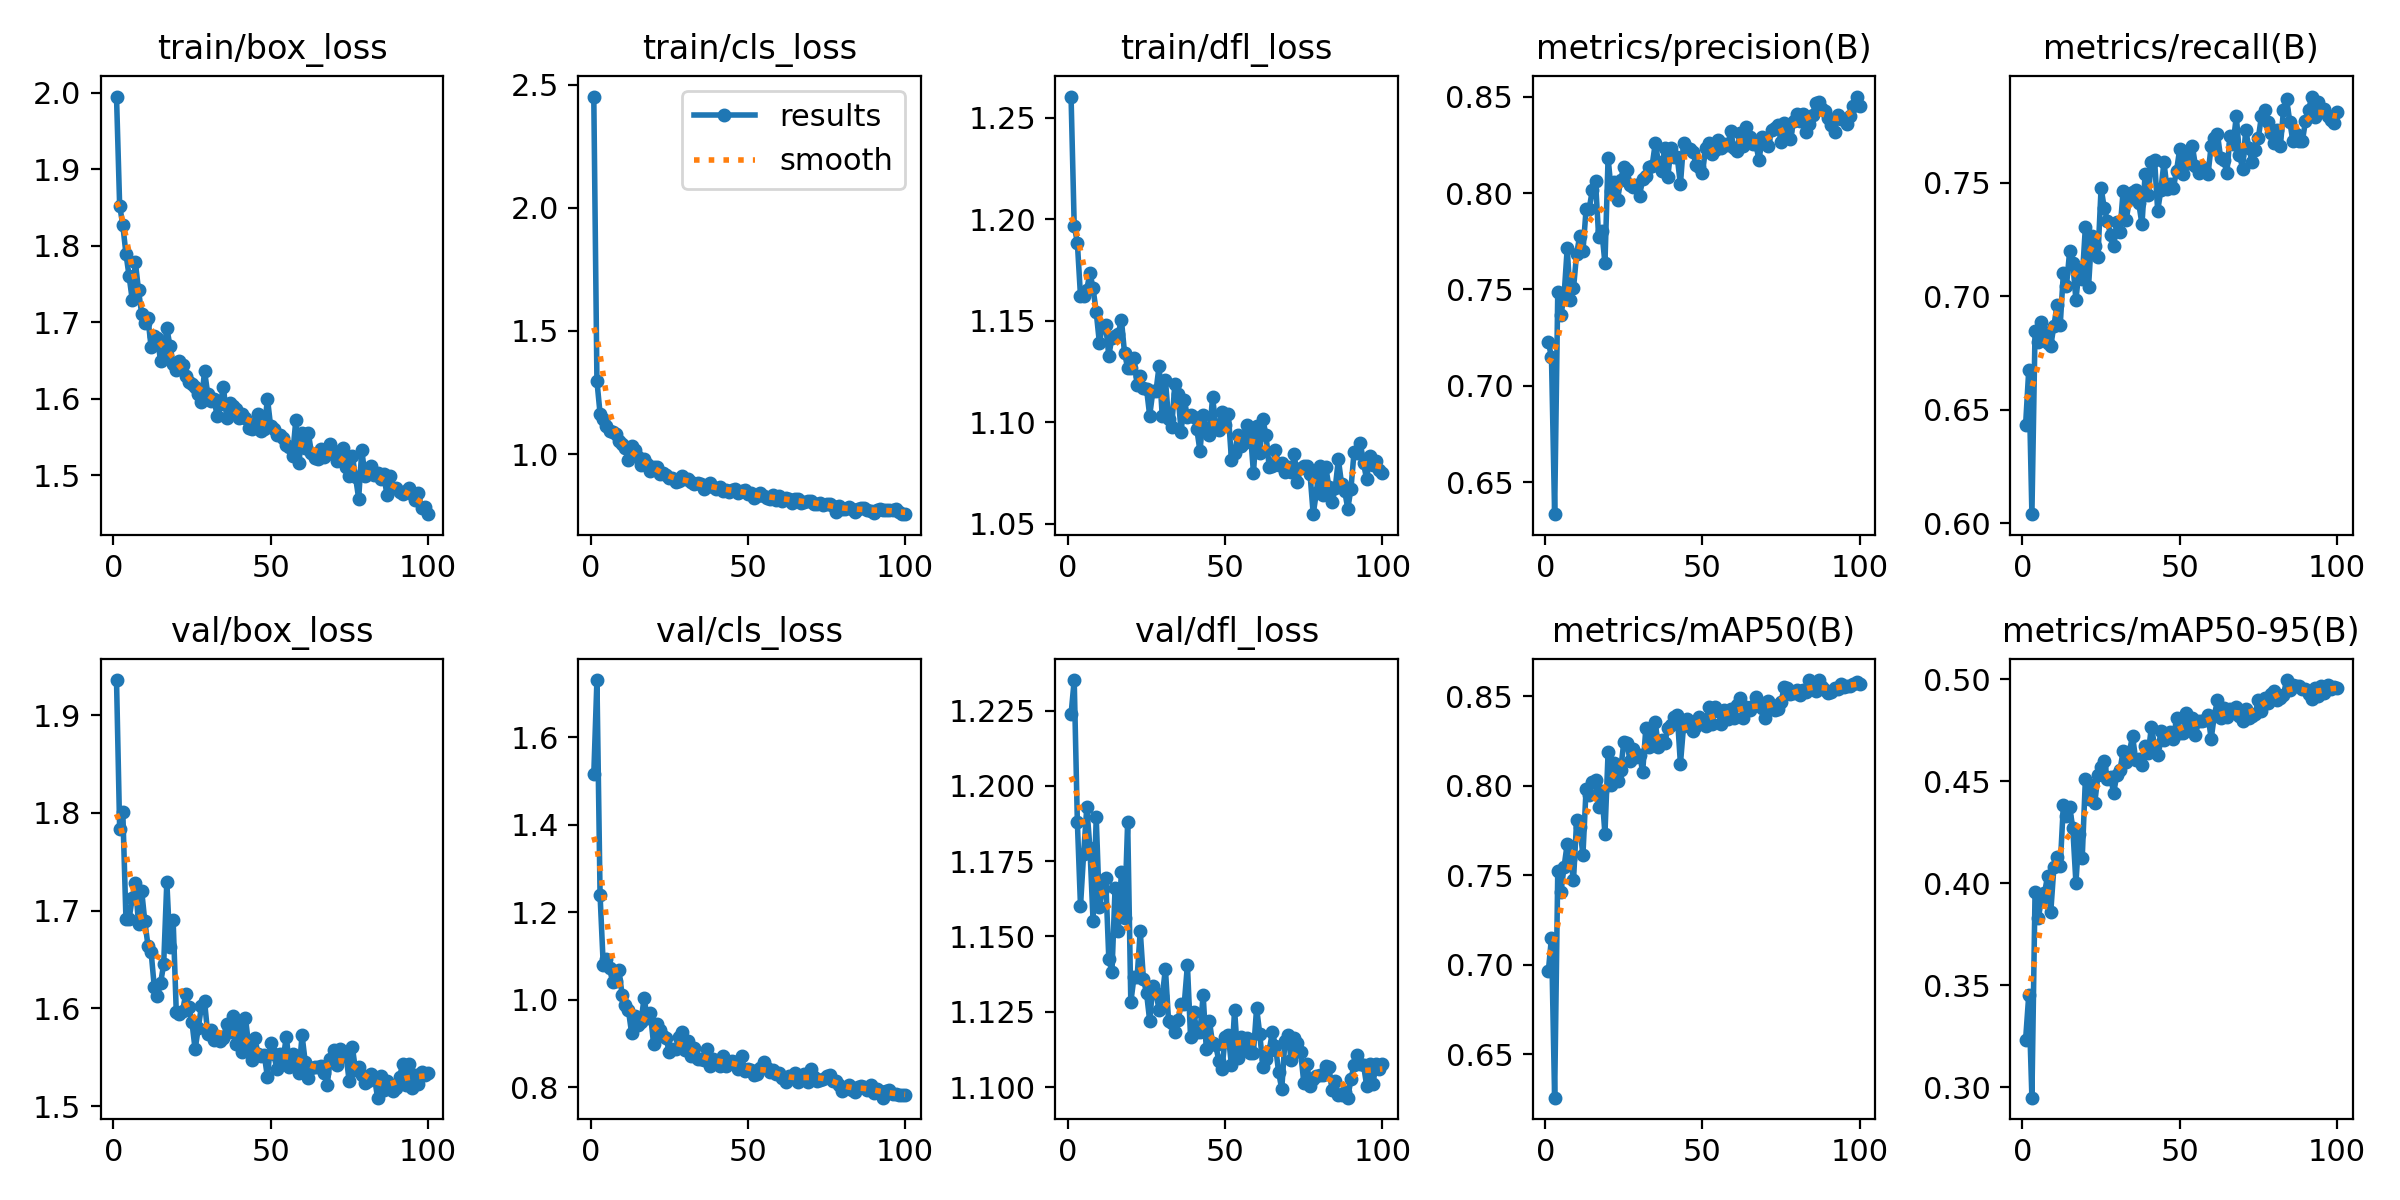

In [8]:
Image("/mnt/storage2/PanNuke/NuInseg/NuInsegyolov12/100epochs/results.png")

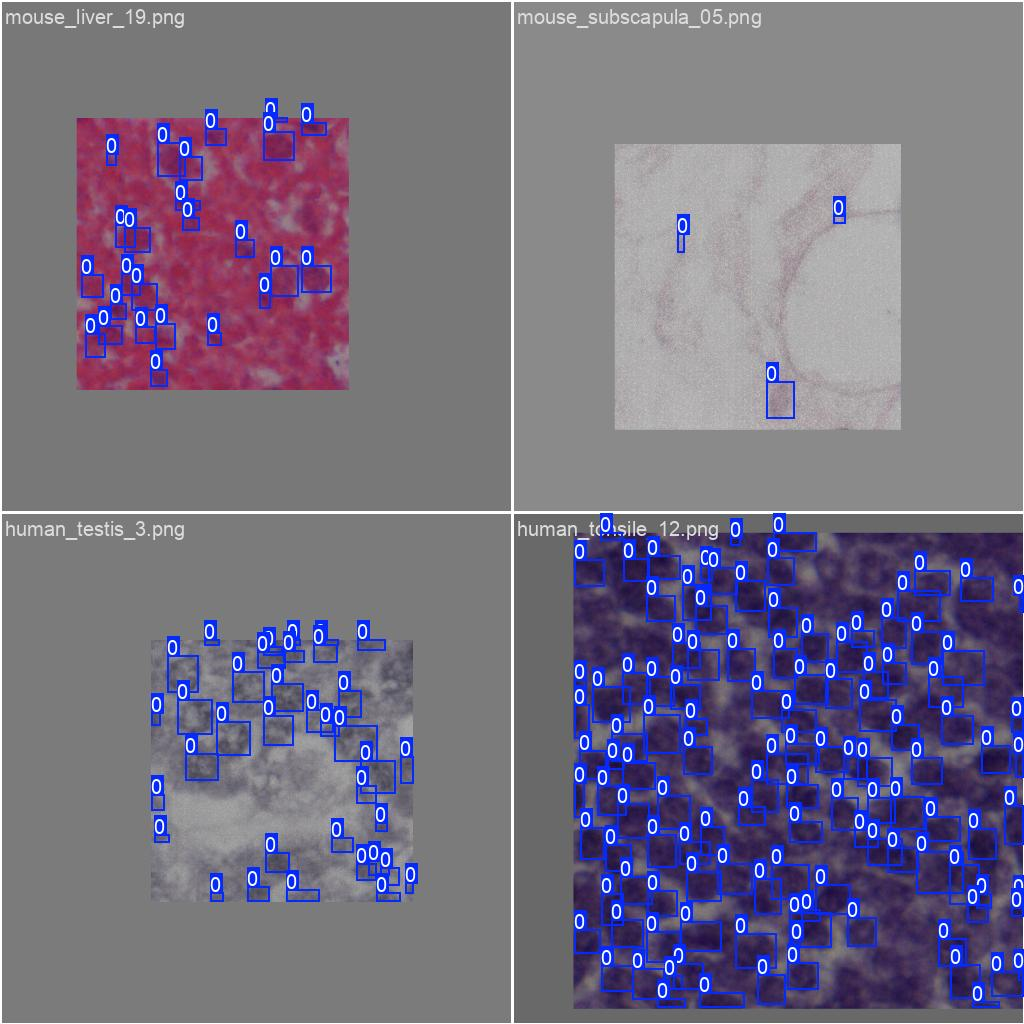

In [9]:
Image(filename='/mnt/storage2/PanNuke/NuInseg/NuInsegyolov12/100epochs/train_batch10532.jpg', width=900)

In [10]:
my_new_model = YOLO('/mnt/storage2/PanNuke/NuInseg/NuInsegyolov12/100epochs/weights/last.pt')

In [11]:
new_image = '/mnt/storage2/PanNuke/NuInseg/yolo_dataset/test/images/human_liver_34.png'
new_results=my_new_model.predict(new_image, conf=0.5)


image 1/1 /mnt/storage2/PanNuke/NuInseg/yolo_dataset/test/images/human_liver_34.png: 512x512 31 Nucleis, 7.7ms
Speed: 0.9ms preprocess, 7.7ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 512)


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

new_result_array = new_results[0].plot()
plt.figure(figsize=(9, 9))
plt.imshow(new_result_array)
plt.savefig('outputyolov12.png', bbox_inches='tight', dpi=300)  # Saves to current directory
plt.close()  # Prevents memory leaks

In [14]:
import csv
import cv2
import os
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Directory path to the input images folder
input_images_directory = "/mnt/storage2/PanNuke/NuInseg/yolo_dataset/test/images"
output_csv_path = "/mnt/storage2/PanNuke/NuInseg/yolo_dataset/test_results/output_objects_yolo12.csv"

# Extract the directory name from the full path
output_dir_name = os.path.dirname(output_csv_path)

# Check if the directory exists
if not os.path.exists(output_dir_name):
    os.makedirs(output_dir_name)

# List of valid image extensions. This ensures that the code doesn't throw
# errors if your directory has non-images, like .json or other text files.
valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']

# Open the CSV file for writing
with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row in the CSV file
    csvwriter.writerow(["File Name", "Class Name", "Object Number", "Area", "Centroid", "BoundingBox"])

    # Loop over the images in the input folder
    for image_filename in os.listdir(input_images_directory):
        # Check if the file has a valid image extension
        if not any(image_filename.lower().endswith(ext) for ext in valid_extensions):
            continue

        image_path = os.path.join(input_images_directory, image_filename)
        new_im = cv2.imread(image_path)

        # Perform prediction on the new image
        new_results = my_new_model.predict(new_im, conf=0.2)  # Adjust conf threshold


        # Access the bounding boxes and class labels from new_results
        bounding_boxes = new_results[0].boxes.data.cpu().numpy()  # Move to CPU and convert to NumPy array
        class_labels = [0 for _ in range(len(bounding_boxes))]  # Assuming all objects are 'Nuclei'

        # Write the object-level information to the CSV file
        for i, bbox in enumerate(bounding_boxes):
            object_number = i + 1
            x1, y1, x2, y2 = bbox[:4]  # Only take the first 4 values
            area = (x2 - x1) * (y2 - y1)
            centroid = ((x1 + x2) / 2, (y1 + y2) / 2)
            bounding_box = (x1, y1, x2, y2)

            #
            class_name = 'Nuclei'  # Since all objects are 'Nuclei' in this example
            csvwriter.writerow([image_filename, class_name, object_number, area, centroid, bounding_box])

print("Object-level information saved to CSV file.")


0: 512x512 34 Nucleis, 9.0ms
Speed: 1.4ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 16 Nucleis, 7.8ms
Speed: 1.3ms preprocess, 7.8ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 34 Nucleis, 7.4ms
Speed: 0.7ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 106 Nucleis, 7.4ms
Speed: 0.6ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 31 Nucleis, 7.3ms
Speed: 0.6ms preprocess, 7.3ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 60 Nucleis, 7.4ms
Speed: 0.7ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 70 Nucleis, 7.3ms
Speed: 0.6ms preprocess, 7.3ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 512)

0: 512x512 19 Nucleis, 7.4ms
Speed: 0.6ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 5

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/mnt/storage2/PanNuke/NuInseg/yolo_dataset/test_results/output_objects_yolo12.csv')

In [17]:
# Correct syntax for all pandas versions
df['Base Name'] = df['File Name'].str.rsplit('_', n=1).str[0]



# Group by the base name and compute the average number of nuclei
avg_nuclei_per_base_name = df.groupby('Base Name')['Object Number'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.barplot(data=avg_nuclei_per_base_name, x='Base Name', y='Object Number')
plt.title('Average Number of Nuclei per Image Type')
plt.xticks(rotation=90)
plt.savefig('nuclei_averagesyolo12.png', 
           bbox_inches='tight',  # Remove whitespace
           dpi=300,              # High resolution
           facecolor='white') 
plt.show()

<Figure size 1500x600 with 1 Axes>